# Multi-class Classification using Deep Neural Networks

We will be using the same steps that we discussed in Binary Classification, its best to visit Binary classification concepts first before proceeding to multi-class. You can check it out at medium

In [1]:
# Note: Before running the code make sure TensorFlow and Keras are installed.
# If not installed use the 2 commands below,
# !pip install tensorflow
# !pip install keras
# import required libraries

import numpy as np
import tensorflow.keras
from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1]] # Centers for the data classes created
X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)
# print(X)
# print(y)
# From the below output we can see that labels are 0, 1 and 2.

3 Clusters with labels 0,1 and 2


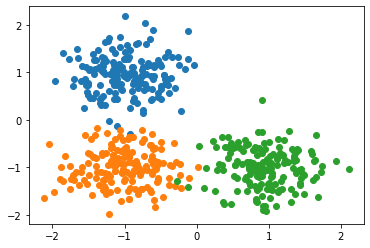

In [3]:
# Now let's Plot and visualize clusters of labels 0, 1 and 2
# plt.scatter(X[y==0, 0], X[y==0, 1]) let's begin with the dataset labeled 0 then 1 then 2
# We must first access our dataset and then we'll do a boolean check, i.e , grab me all x coordinates which correspond to labels of 0 where that corresponding label is equal to 0 (y==0). All the X-coordinates are in the first index of the array(so we use 0th index). we'll do the same exact thing for the corresponding y coordinates.

print("3 Clusters with labels 0,1 and 2")
plt.scatter(X[y==0, 0], X[y==0, 1]) # label 0
plt.scatter(X[y==1, 0], X[y==1, 1]) # label 1
plt.scatter(X[y==2, 0], X[y==2, 1]) # label 2

In [4]:
# Our labeled data needs to go through "Hot encoding process".
# This process eliminates unnecessary dependencies within our data labels and ensures that our neural network does not create unjustified relationships between our data labels.
# Lets have a look at how to do this?
# We use a to_categoricall function which hot encodes a given input. 2nd argument is a integer value that represents the No.of data classes in our dataset.

print("Before hot encoding:")
print(y)
y_cat = to_categorical(y, 3)
print("After hot encoding")
print(y_cat)

Before hot encoding:
[2 2 2 0 1 0 0 2 2 2 1 1 0 0 1 2 2 2 2 0 2 0 1 2 1 2 0 0 2 1 1 0 0 2 1 0 2
 0 2 0 0 2 1 0 2 0 1 2 0 2 0 1 1 0 1 2 2 0 1 2 0 2 0 2 1 0 1 1 1 1 2 1 1 1
 1 1 2 1 1 2 0 1 2 2 1 0 2 1 1 2 0 0 2 1 2 2 0 1 2 0 2 1 1 2 2 0 0 1 2 1 1
 2 0 0 1 0 2 2 2 2 1 2 1 2 0 2 2 0 1 0 0 0 0 2 0 1 0 2 2 0 2 2 2 2 1 2 0 0
 0 2 1 0 2 0 0 1 1 0 2 0 0 1 1 2 2 0 2 1 2 2 2 1 1 1 2 0 0 1 0 1 2 2 1 1 2
 1 1 0 0 2 2 1 0 0 0 0 2 2 0 2 1 1 2 0 0 2 2 0 1 0 2 0 2 2 0 0 2 1 2 0 2 0
 1 1 2 0 0 0 2 1 2 2 2 0 0 1 0 2 0 2 0 2 1 1 1 2 2 1 1 1 0 1 2 1 0 1 2 2 0
 0 0 1 1 1 2 1 1 2 1 1 2 0 0 0 2 0 2 0 0 0 2 1 1 0 2 1 0 0 1 1 1 1 2 1 1 0
 0 0 2 1 1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 2 0 0 1 2 0 1 2 2 2 2 2 0 1 2 0 2 1
 0 0 1 2 0 2 0 1 1 0 2 1 0 1 1 1 0 2 0 2 0 1 1 0 1 1 1 2 2 0 2 0 2 2 1 1 0
 2 2 2 1 1 1 2 2 0 1 2 1 2 0 1 2 2 2 0 1 1 1 2 0 2 0 0 2 1 1 1 2 0 1 0 0 1
 1 2 0 0 1 2 1 1 0 2 0 1 0 2 0 0 0 1 1 1 2 0 1 1 0 2 1 2 1 1 1 1 0 0 0 0 0
 2 2 1 1 0 1 0 2 2 2 2 0 0 1 1 0 0 1 1 1 2 2 1 1 1 1 0 0 2 0 1 0 1 0 1 1 2
 2 0

In [5]:
# define neural network and its structure using softmax activation function
# optimizer = adeam with learning rate 0.1. 

model = Sequential()
model.add(Dense(units=3, input_shape=(2,), activation="softmax"))
model.compile(Adam(0.1), loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
# Train the data with data as x and labels which are hot encoded,i.e, y_cat
# verbose displays the performace.
# Remember that very less epochs can lead to underfitting and excess epochs can lead to overfitting.

model.fit(x=X, y=y_cat, verbose=1, batch_size= 50, epochs=50)

Epoch 1/50
10/10 [==============================] - 1s 2ms/step - loss: 0.6657 - accuracy: 0.8380
Epoch 2/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9900
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9880
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0815 - accuracy: 0.9880
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9900
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9900
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0569 - accuracy: 0.9900
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0538 - accuracy: 0.9880
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9880
Epoch 10/50
10/10 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9900
Epoch 11/50
10/10 [

In [7]:
def plot_multiclass_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    grid = np.c_[xx.ravel(), yy.ravel()]
    pred_func = np.argmax(model.predict(grid), axis=1)    # model.predict_classes(point) is deprecated
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

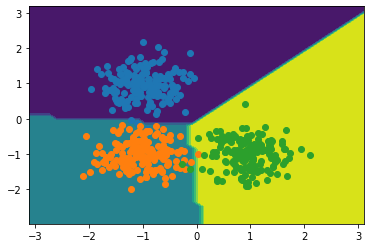

In [8]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

Prediction label is:  [1]


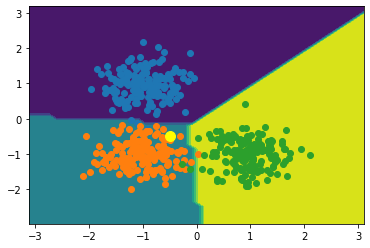

In [9]:
plot_multiclass_decision_boundary(X, y_cat, model)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])

x = -0.5
y = -0.5

point = np.array([[x, y]])
prediction = np.argmax(model.predict(point), axis=1)   # model.predict_classes(point) is deprecated
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction label is: ", prediction)
# If the input point is in the violet zone it give output as class 0
# If the input point is in the green zone it give output as class  1
# If the input point is in the yellow zone it give output as class 2

# Its Challenge time
> Try Classifying 5 classes for better understanding. Use the same concepts as above and train a model that classifies a point in 5 classes. All the best

If you have any doubts regarding this challenge refer the challenge code below. Its just for reference don't just copy it :)

In [10]:
# After importing the libraries

# n_pts = 500
# centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
# X, y = datasets.make_blobs(n_samples=n_pts, random_state = 123, centers=centers, cluster_std=0.4)

# plt.scatter(X[y==0, 0], X[y==0, 1])
# plt.scatter(X[y==1, 0], X[y==1, 1])
# plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plt.scatter(X[y==4, 0], X[y==4, 1])

# print(y)
# y_cat = to_categorical(y, 5)
# print(y_cat)
# model = Sequential()
# model.add(Dense(5, input_shape=(2,), activation='softmax'))
# model.compile(Adam(lr=0.1), 'categorical_crossentropy', metrics=['accuracy'])

# history = model.fit(X, y_cat, verbose=1, batch_size = 50, epochs=100)
# def plot_multiclass_decision_boundary(X, y, model):
#     x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
#     y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
#     xx, yy = np.meshgrid(x_span, y_span)
#     grid = np.c_[xx.ravel(), yy.ravel()]
#     pred_func = model.predict_classes(grid)
#     z = pred_func.reshape(xx.shape)
#     plt.contourf(xx, yy, z)
# plot_multiclass_decision_boundary(X, y_cat, model)
# plt.scatter(X[y==0, 0], X[y==0, 1])
# plt.scatter(X[y==1, 0], X[y==1, 1])
# plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plt.scatter(X[y==4, 0], X[y==4, 1])
# plot_multiclass_decision_boundary(X, y_cat, model)
# plt.scatter(X[y==0, 0], X[y==0, 1])
# plt.scatter(X[y==1, 0], X[y==1, 1])
# plt.scatter(X[y==2, 0], X[y==2, 1])
# plt.scatter(X[y==3, 0], X[y==3, 1])
# plt.scatter(X[y==4, 0], X[y==4, 1])

# x = -0.5
# y = -0.5

# point = np.array([[x, y]])
# prediction = model.predict_classes(point)
# plt.plot([x], [y], marker='o', markersize=10, color="yellow")
# print("Prediction is: ", prediction)